# WordCloud, presidential conferences (México)

## Extract data

In [1]:
from bs4 import BeautifulSoup
import requests

# url = 'https://lopezobrador.org.mx/2020/04/05/discurso-del-presidente-andres-manuel-lopez-obrador-en-su-informe-al-pueblo-de-mexico/'
url = 'https://lopezobrador.org.mx/2021/01/22/version-estenografica-de-la-conferencia-de-prensa-matutina-del-presidente-andres-manuel-lopez-obrador-464/'
res_request = requests.get(url)

In [2]:
soup = BeautifulSoup(res_request.text, 'html.parser')

In [3]:
# Extract the text and speakers
soup1 = soup.select("div p")
soup1

[<p class="has-text-align-right has-small-font-size"><em>2021: Año de la Independencia</em></p>,
 <p class="p1"><b>PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:</b> Buenos días.<span id="more-141013"></span></p>,
 <p class="p1">Vamos a informar sobre la distribución de las vacunas, sobre el avance que se tiene en la vacunación en hospitales COVID, tanto del sector público como del sector privado, y también informar sobre la vacunación a maestros en Campeche a partir de mañana. Vamos a presentar esos dos informes, cómo vamos en la vacunación general, en el plan de aplicar vacunas en hospitales donde están médicos, enfermeras, trabajadores de la salud, atendiendo, salvando vidas, cómo vamos protegiéndolos, qué avance se lleva en lo que corresponde al sector público, privado; y también sobre esta vacunación que se va a llevar a cabo a partir de mañana en Campeche para maestros.</p>,
 <p class="p1">El propósito no sólo es informarles a ustedes, como siempre lo hacemos, sino también nos ven mucho

In [4]:
# Analize and complete the names of speakers

import numpy as np 

speaker = []
current_speaker = np.nan

for i in soup1:
        if i.b:
            speaker.append(i.b.text)
            current_speaker = i.b.text
        else:
            speaker.append(current_speaker)
len(speaker)

330

In [5]:
speaker

[nan,
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'HUGO LÓPEZ-GATELL RAMÍREZ, SUBSECRETARIO DE PREVENCIÓN Y PROMOCIÓN DE LA SALUD:',
 'HUGO LÓPEZ-GATELL RAMÍREZ, SUBSECRETARIO DE PREVENCIÓN Y PROMOCIÓN DE LA SALUD:',
 'HUGO LÓPEZ-GATELL RAMÍREZ, SUBSECRETARIO DE PREVENCIÓN Y PROMOCIÓN DE LA SALUD:',
 'HUGO LÓPEZ-GATELL RAMÍREZ, SUBSECRETARIO DE PREVENCIÓN Y PROMOCIÓN DE LA SALUD:',
 'HUGO LÓPEZ-GATELL RAMÍREZ, SUBSECRETARIO DE PREVENCIÓN Y PROMOCIÓN DE LA SALUD:',
 'HUGO LÓPEZ-GATELL RAMÍREZ, SUBSECRETARIO DE PREVENCIÓN Y PROMOCIÓN DE LA SALUD:',
 'HUGO LÓPEZ-GATELL RAMÍREZ, SUBSECRETARIO DE PREVENCIÓN Y PROMOCIÓN DE LA SALUD:',
 'HUGO LÓPEZ-GATELL RAMÍREZ, SUBSECRETARIO DE PREVENCIÓN Y PROMOCIÓN DE LA SALUD:',
 'HUGO LÓPEZ-GATELL RAMÍREZ, SUBSECRETARIO DE PREVENCIÓN Y

In [6]:
# Count speech rows
speech = [i.text for i in soup1]
len(speech)

330

In [7]:
# Create a dataframe with speakers and speech

import pandas as pd

dfa = pd.DataFrame(
                    {
                        "speaker" : speaker,
                        "speech" : speech
                    })
dfa

,speaker,speech
0,NaN,2021: Año de la Independencia
1,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR: Buenos...
2,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,Vamos a informar sobre la distribución de las ...
3,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,"El propósito no sólo es informarles a ustedes,..."
4,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,Ese es un propósito principal o uno de los pro...
...,...,...
325,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,Y además hacer esta reforma administrativa no ...
326,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,Yo les comentaba que desaparece la coordinació...
327,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,Me tengo que ir porque ya no hay avión preside...
328,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,+++++


In [8]:
# Delete empty rows (without speakers: titles or dates)
dfa = dfa.dropna()
dfa.head()

,speaker,speech
1,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR: Buenos...
2,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,Vamos a informar sobre la distribución de las ...
3,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,"El propósito no sólo es informarles a ustedes,..."
4,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,Ese es un propósito principal o uno de los pro...
5,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,Empezamos con la vacunación en general y luego...


In [9]:
# Get names of indexes for which column it's not a speech
indexNames = dfa[ dfa['speech'].str.contains('Copyright Derechos Reservados') ].index

dfb = dfa.copy()
# Delete these row indexes from dataFrame
dfb.drop(indexNames , inplace=True )

In [10]:
# Get names of indexes for which column it's not a speech
indexNames = dfb[ dfb['speech'] == '+++++' ].index

dfc = dfb.copy()

# Delete these row indexes from dataFrame
dfc.drop(indexNames , inplace=True)

In [11]:
# Get names of indexes for which column it's not a speech
indexNames = dfc[ dfc['speech'].str.lower().str.contains('inaudible')].index

dfd = dfc.copy()

# Delete these row indexes from dataFrame
dfd.drop(indexNames , inplace=True)

In [12]:
dfd

,speaker,speech
1,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR: Buenos...
2,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,Vamos a informar sobre la distribución de las ...
3,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,"El propósito no sólo es informarles a ustedes,..."
4,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,Ese es un propósito principal o uno de los pro...
5,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,Empezamos con la vacunación en general y luego...
...,...,...
323,INTERLOCUTORA:,"INTERLOCUTORA: Que también, presidente, está c..."
324,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR: Más el...
325,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,Y además hacer esta reforma administrativa no ...
326,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,Yo les comentaba que desaparece la coordinació...


In [13]:
dfd['speaker'] = dfd['speaker'].str.replace(':', '').str.strip()
dfd


,speaker,speech
1,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR: Buenos...
2,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Vamos a informar sobre la distribución de las ...
3,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,"El propósito no sólo es informarles a ustedes,..."
4,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Ese es un propósito principal o uno de los pro...
5,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Empezamos con la vacunación en general y luego...
...,...,...
323,INTERLOCUTORA,"INTERLOCUTORA: Que también, presidente, está c..."
324,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR: Más el...
325,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Y además hacer esta reforma administrativa no ...
326,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Yo les comentaba que desaparece la coordinació...


In [14]:
dfd['speaker'].value_counts()

PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR                                            167
INTERLOCUTORA                                                                      62
HUGO LÓPEZ-GATELL RAMÍREZ, SUBSECRETARIO DE PREVENCIÓN Y PROMOCIÓN DE LA SALUD     34
HUGO LÓPEZ-GATELL RAMÍREZ                                                          25
LUIS CRESENCIO SANDOVAL GONZÁLEZ, SECRETARIO DE LA DEFENSA NACIONAL                17
PREGUNTA                                                                           13
LUIS CRESENCIO SANDOVAL GONZÁLEZ                                                    5
INTERLOCUTOR                                                                        1
Name: speaker, dtype: int64

In [15]:
# Split speaker into speaker name and job title

dfd[['speaker','job']] = dfd.speaker.str.split(',', expand=True)
dfd


,speaker,speech,job
1,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR: Buenos...,None
2,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Vamos a informar sobre la distribución de las ...,None
3,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,"El propósito no sólo es informarles a ustedes,...",None
4,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Ese es un propósito principal o uno de los pro...,None
5,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Empezamos con la vacunación en general y luego...,None
...,...,...,...
323,INTERLOCUTORA,"INTERLOCUTORA: Que también, presidente, está c...",None
324,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR: Más el...,None
325,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Y además hacer esta reforma administrativa no ...,None
326,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Yo les comentaba que desaparece la coordinació...,None


In [16]:
dfd['speaker'].value_counts()

PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR    167
INTERLOCUTORA                              62
HUGO LÓPEZ-GATELL RAMÍREZ                  59
LUIS CRESENCIO SANDOVAL GONZÁLEZ           22
PREGUNTA                                   13
INTERLOCUTOR                                1
Name: speaker, dtype: int64

In [17]:
dfd['job'].value_counts()

 SUBSECRETARIO DE PREVENCIÓN Y PROMOCIÓN DE LA SALUD    34
 SECRETARIO DE LA DEFENSA NACIONAL                      17
Name: job, dtype: int64

In [18]:
dfd['speaker'] = dfd['speaker'].str.strip()
dfd

,speaker,speech,job
1,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR: Buenos...,None
2,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Vamos a informar sobre la distribución de las ...,None
3,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,"El propósito no sólo es informarles a ustedes,...",None
4,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Ese es un propósito principal o uno de los pro...,None
5,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Empezamos con la vacunación en general y luego...,None
...,...,...,...
323,INTERLOCUTORA,"INTERLOCUTORA: Que también, presidente, está c...",None
324,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR: Más el...,None
325,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Y además hacer esta reforma administrativa no ...,None
326,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Yo les comentaba que desaparece la coordinació...,None


In [19]:
dfd['job'] = dfd['job'].str.strip()
dfd

,speaker,speech,job
1,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR: Buenos...,None
2,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Vamos a informar sobre la distribución de las ...,None
3,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,"El propósito no sólo es informarles a ustedes,...",None
4,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Ese es un propósito principal o uno de los pro...,None
5,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Empezamos con la vacunación en general y luego...,None
...,...,...,...
323,INTERLOCUTORA,"INTERLOCUTORA: Que también, presidente, está c...",None
324,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR: Más el...,None
325,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Y además hacer esta reforma administrativa no ...,None
326,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Yo les comentaba que desaparece la coordinació...,None


In [20]:
dfd['job'].value_counts()

SUBSECRETARIO DE PREVENCIÓN Y PROMOCIÓN DE LA SALUD    34
SECRETARIO DE LA DEFENSA NACIONAL                      17
Name: job, dtype: int64

In [21]:
# Get a set from speakers and jobs:

unique_speakers = set(dfd['speaker'])

unique_jobs = set(dfd['job'])
print(unique_speakers, unique_jobs)

{'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR', 'HUGO LÓPEZ-GATELL RAMÍREZ', 'INTERLOCUTOR', 'LUIS CRESENCIO SANDOVAL GONZÁLEZ', 'PREGUNTA', 'INTERLOCUTORA'} {'SUBSECRETARIO DE PREVENCIÓN Y PROMOCIÓN DE LA SALUD', None, 'SECRETARIO DE LA DEFENSA NACIONAL'}


In [22]:
list_unique_speakers = list(unique_speakers)
list_unique_speakers 

['PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR',
 'HUGO LÓPEZ-GATELL RAMÍREZ',
 'INTERLOCUTOR',
 'LUIS CRESENCIO SANDOVAL GONZÁLEZ',
 'PREGUNTA',
 'INTERLOCUTORA']

In [23]:
list_unique_jobs = list(unique_jobs)
list_unique_jobs

['SUBSECRETARIO DE PREVENCIÓN Y PROMOCIÓN DE LA SALUD',
 None,
 'SECRETARIO DE LA DEFENSA NACIONAL']

In [24]:
# Order list. Necesary because...
# ...have to remove first'INTERLOCUTORA' before 'INTERLOCUTOR' or an letter 'A' is don't erased.
list_unique_speakers.sort(reverse=True)

# Erase None from the list of jobs
list_unique_jobs = list(filter(None, list_unique_jobs)) 
list_unique_jobs.sort(reverse=True)

print (list_unique_speakers, list_unique_jobs)

['PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR', 'PREGUNTA', 'LUIS CRESENCIO SANDOVAL GONZÁLEZ', 'INTERLOCUTORA', 'INTERLOCUTOR', 'HUGO LÓPEZ-GATELL RAMÍREZ'] ['SUBSECRETARIO DE PREVENCIÓN Y PROMOCIÓN DE LA SALUD', 'SECRETARIO DE LA DEFENSA NACIONAL']


In [25]:
# Create dict with strings to erase
dict = {}

# Add unique speakers and jobs to the dict

for sp in list_unique_speakers:
    dict[sp] = ''
    
for sp in list_unique_jobs:
    dict[sp] = ''
    
dict

{'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR': '',
 'PREGUNTA': '',
 'LUIS CRESENCIO SANDOVAL GONZÁLEZ': '',
 'INTERLOCUTORA': '',
 'INTERLOCUTOR': '',
 'HUGO LÓPEZ-GATELL RAMÍREZ': '',
 'SUBSECRETARIO DE PREVENCIÓN Y PROMOCIÓN DE LA SALUD': '',
 'SECRETARIO DE LA DEFENSA NACIONAL': ''}

In [26]:
# Erase the speakers and jobs from the speech

serie_tmp = dfd['speech'].replace(dict, regex=True)
serie_tmp

1                                         : Buenos días.
2      Vamos a informar sobre la distribución de las ...
3      El propósito no sólo es informarles a ustedes,...
4      Ese es un propósito principal o uno de los pro...
5      Empezamos con la vacunación en general y luego...
                             ...                        
323         : Que también, presidente, está cuestionada.
324    : Más el INAI ¿no? Cuatro es mucho. El gobiern...
325    Y además hacer esta reforma administrativa no ...
326    Yo les comentaba que desaparece la coordinació...
327    Me tengo que ir porque ya no hay avión preside...
Name: speech, Length: 324, dtype: object

In [27]:
# Convert serie to dataframe
df_tmp = serie_tmp.to_frame('clean_speech')

df_tmp

,clean_speech
1,: Buenos días.
2,Vamos a informar sobre la distribución de las ...
3,"El propósito no sólo es informarles a ustedes,..."
4,Ese es un propósito principal o uno de los pro...
5,Empezamos con la vacunación en general y luego...
...,...
323,": Que también, presidente, está cuestionada."
324,: Más el INAI ¿no? Cuatro es mucho. El gobiern...
325,Y además hacer esta reforma administrativa no ...
326,Yo les comentaba que desaparece la coordinació...


In [28]:
# Concat the dataframe
dfd = pd.concat([dfd, df_tmp], axis=1)
dfd


,speaker,speech,job,clean_speech
1,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR: Buenos...,None,: Buenos días.
2,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Vamos a informar sobre la distribución de las ...,None,Vamos a informar sobre la distribución de las ...
3,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,"El propósito no sólo es informarles a ustedes,...",None,"El propósito no sólo es informarles a ustedes,..."
4,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Ese es un propósito principal o uno de los pro...,None,Ese es un propósito principal o uno de los pro...
5,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Empezamos con la vacunación en general y luego...,None,Empezamos con la vacunación en general y luego...
...,...,...,...,...
323,INTERLOCUTORA,"INTERLOCUTORA: Que también, presidente, está c...",None,": Que también, presidente, está cuestionada."
324,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR: Más el...,None,: Más el INAI ¿no? Cuatro es mucho. El gobiern...
325,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Y además hacer esta reforma administrativa no ...,None,Y además hacer esta reforma administrativa no ...
326,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Yo les comentaba que desaparece la coordinació...,None,Yo les comentaba que desaparece la coordinació...


In [29]:
# Delete dirty and temporal columns 
dfd = dfd.drop(columns=['speech','job'])
dfd

,speaker,clean_speech
1,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,: Buenos días.
2,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Vamos a informar sobre la distribución de las ...
3,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,"El propósito no sólo es informarles a ustedes,..."
4,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Ese es un propósito principal o uno de los pro...
5,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Empezamos con la vacunación en general y luego...
...,...,...
323,INTERLOCUTORA,": Que también, presidente, está cuestionada."
324,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,: Más el INAI ¿no? Cuatro es mucho. El gobiern...
325,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Y además hacer esta reforma administrativa no ...
326,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Yo les comentaba que desaparece la coordinació...


In [30]:
# Group speech by speaker

tmp = dfd.groupby(['speaker'])['clean_speech'].apply(' '.join)
tmp

speaker
HUGO LÓPEZ-GATELL RAMÍREZ                 , : Con gusto presidente, gracias. Muy buenos ...
INTERLOCUTOR                                                           : Público y privado.
INTERLOCUTORA                             : Y sobre la logística particularmente. Entend...
LUIS CRESENCIO SANDOVAL GONZÁLEZ          , : Con su permiso, señor presidente. Si ponen...
PREGUNTA                                  : Buenos días, presidente. Meme Yamel, de The ...
PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR    : Buenos días. Vamos a informar sobre la distr...
Name: clean_speech, dtype: object

In [31]:
# Convert serie to dataframe
dfe = tmp.to_frame()

dfe

,clean_speech
speaker,
HUGO LÓPEZ-GATELL RAMÍREZ,", : Con gusto presidente, gracias. Muy buenos ..."
INTERLOCUTOR,: Público y privado.
INTERLOCUTORA,: Y sobre la logística particularmente. Entend...
LUIS CRESENCIO SANDOVAL GONZÁLEZ,", : Con su permiso, señor presidente. Si ponen..."
PREGUNTA,": Buenos días, presidente. Meme Yamel, de The ..."
PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,: Buenos días. Vamos a informar sobre la distr...


## Using nltk


In [32]:
# Using nltk

import nltk
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('spanish'))

print(stop_words)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/fertorresmx/nltk_data...


{'una', 'vuestras', 'mucho', 'habidas', 'seremos', 'esto', 'hube', 'la', 'estaríais', 'tendréis', 'estuvieses', 'como', 'estuve', 'otras', 'del', 'estados', 'estarás', 'estuvo', 'fuisteis', 'poco', 'habida', 'tenida', 'estarías', 'tuviésemos', 'las', 'estuviste', 'más', 'hayas', 'habrán', 'tenías', 'estaba', 'tenemos', 'ti', 'hubiste', 'él', 'tienen', 'tuve', 'estoy', 'sois', 'tengan', 'habrían', 'vosotros', 'hayan', 'hasta', 'seríamos', 'hemos', 'fueras', 'otros', 'habido', 'tuyos', 'contra', 'teníais', 'habéis', 'estabas', 'esas', 'habían', 'nuestra', 'hayáis', 'o', 'he', 'tendríais', 'mis', 'hubisteis', 'estará', 'estar', 'esos', 'tuyo', 'unos', 'no', 'tengas', 'estáis', 'nuestros', 'tuvierais', 'entre', 'hubiéramos', 'quienes', 'estuviera', 'estuviesen', 'te', 'serían', 'el', 'sentidos', 'estabais', 'tengo', 'estada', 'están', 'sentid', 'está', 'cuando', 'en', 'fuera', 'estuvisteis', 'me', 'has', 'somos', 'hubo', 'nosotros', 'nuestras', 'tendrás', 'fuiste', 'tiene', 'hubieron', 'tu

[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fertorresmx/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
dfe

,clean_speech
speaker,
HUGO LÓPEZ-GATELL RAMÍREZ,", : Con gusto presidente, gracias. Muy buenos ..."
INTERLOCUTOR,: Público y privado.
INTERLOCUTORA,: Y sobre la logística particularmente. Entend...
LUIS CRESENCIO SANDOVAL GONZÁLEZ,", : Con su permiso, señor presidente. Si ponen..."
PREGUNTA,": Buenos días, presidente. Meme Yamel, de The ..."
PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,: Buenos días. Vamos a informar sobre la distr...


In [34]:
# Take the speech from president

text = dfe['clean_speech'][5]
text

': Buenos días. Vamos a informar sobre la distribución de las vacunas, sobre el avance que se tiene en la vacunación en hospitales COVID, tanto del sector público como del sector privado, y también informar sobre la vacunación a maestros en Campeche a partir de mañana. Vamos a presentar esos dos informes, cómo vamos en la vacunación general, en el plan de aplicar vacunas en hospitales donde están médicos, enfermeras, trabajadores de la salud, atendiendo, salvando vidas, cómo vamos protegiéndolos, qué avance se lleva en lo que corresponde al sector público, privado; y también sobre esta vacunación que se va a llevar a cabo a partir de mañana en Campeche para maestros. El propósito no sólo es informarles a ustedes, como siempre lo hacemos, sino también nos ven muchos por el internet y por distintos medios, para que, en el caso de Campeche, todos los médicos tengan la información, los trabajadores de la educación.\xa0 Ese es un propósito principal o uno de los propósitos principales de es

In [35]:
# Tokenise the data set
from nltk.tokenize import sent_tokenize, word_tokenize

words = word_tokenize(text)
print(words)

[':', 'Buenos', 'días', '.', 'Vamos', 'a', 'informar', 'sobre', 'la', 'distribución', 'de', 'las', 'vacunas', ',', 'sobre', 'el', 'avance', 'que', 'se', 'tiene', 'en', 'la', 'vacunación', 'en', 'hospitales', 'COVID', ',', 'tanto', 'del', 'sector', 'público', 'como', 'del', 'sector', 'privado', ',', 'y', 'también', 'informar', 'sobre', 'la', 'vacunación', 'a', 'maestros', 'en', 'Campeche', 'a', 'partir', 'de', 'mañana', '.', 'Vamos', 'a', 'presentar', 'esos', 'dos', 'informes', ',', 'cómo', 'vamos', 'en', 'la', 'vacunación', 'general', ',', 'en', 'el', 'plan', 'de', 'aplicar', 'vacunas', 'en', 'hospitales', 'donde', 'están', 'médicos', ',', 'enfermeras', ',', 'trabajadores', 'de', 'la', 'salud', ',', 'atendiendo', ',', 'salvando', 'vidas', ',', 'cómo', 'vamos', 'protegiéndolos', ',', 'qué', 'avance', 'se', 'lleva', 'en', 'lo', 'que', 'corresponde', 'al', 'sector', 'público', ',', 'privado', ';', 'y', 'también', 'sobre', 'esta', 'vacunación', 'que', 'se', 'va', 'a', 'llevar', 'a', 'cabo'

In [36]:
# Removes punctuation and numbers

wordsFiltered = [word.lower() for word in words if word.isalpha()]
print(wordsFiltered)


['buenos', 'días', 'vamos', 'a', 'informar', 'sobre', 'la', 'distribución', 'de', 'las', 'vacunas', 'sobre', 'el', 'avance', 'que', 'se', 'tiene', 'en', 'la', 'vacunación', 'en', 'hospitales', 'covid', 'tanto', 'del', 'sector', 'público', 'como', 'del', 'sector', 'privado', 'y', 'también', 'informar', 'sobre', 'la', 'vacunación', 'a', 'maestros', 'en', 'campeche', 'a', 'partir', 'de', 'mañana', 'vamos', 'a', 'presentar', 'esos', 'dos', 'informes', 'cómo', 'vamos', 'en', 'la', 'vacunación', 'general', 'en', 'el', 'plan', 'de', 'aplicar', 'vacunas', 'en', 'hospitales', 'donde', 'están', 'médicos', 'enfermeras', 'trabajadores', 'de', 'la', 'salud', 'atendiendo', 'salvando', 'vidas', 'cómo', 'vamos', 'protegiéndolos', 'qué', 'avance', 'se', 'lleva', 'en', 'lo', 'que', 'corresponde', 'al', 'sector', 'público', 'privado', 'y', 'también', 'sobre', 'esta', 'vacunación', 'que', 'se', 'va', 'a', 'llevar', 'a', 'cabo', 'a', 'partir', 'de', 'mañana', 'en', 'campeche', 'para', 'maestros', 'el', 'pr

In [37]:
# Remove stop words from tokenised data set

filtered_words = [word for word in wordsFiltered if word not in stop_words]
print(filtered_words)

['buenos', 'días', 'vamos', 'informar', 'distribución', 'vacunas', 'avance', 'vacunación', 'hospitales', 'covid', 'sector', 'público', 'sector', 'privado', 'informar', 'vacunación', 'maestros', 'campeche', 'partir', 'mañana', 'vamos', 'presentar', 'dos', 'informes', 'cómo', 'vamos', 'vacunación', 'general', 'plan', 'aplicar', 'vacunas', 'hospitales', 'médicos', 'enfermeras', 'trabajadores', 'salud', 'atendiendo', 'salvando', 'vidas', 'cómo', 'vamos', 'protegiéndolos', 'avance', 'lleva', 'corresponde', 'sector', 'público', 'privado', 'vacunación', 'va', 'llevar', 'cabo', 'partir', 'mañana', 'campeche', 'maestros', 'propósito', 'sólo', 'informarles', 'ustedes', 'siempre', 'hacemos', 'sino', 'ven', 'internet', 'distintos', 'medios', 'caso', 'campeche', 'médicos', 'información', 'trabajadores', 'educación', 'propósito', 'principal', 'propósitos', 'principales', 'conferencias', 'mexicanos', 'pendientes', 'información', 'transmite', 'ayuda', 'vamos', 'vacunar', 'mañana', 'calakmul', 'xpujil'

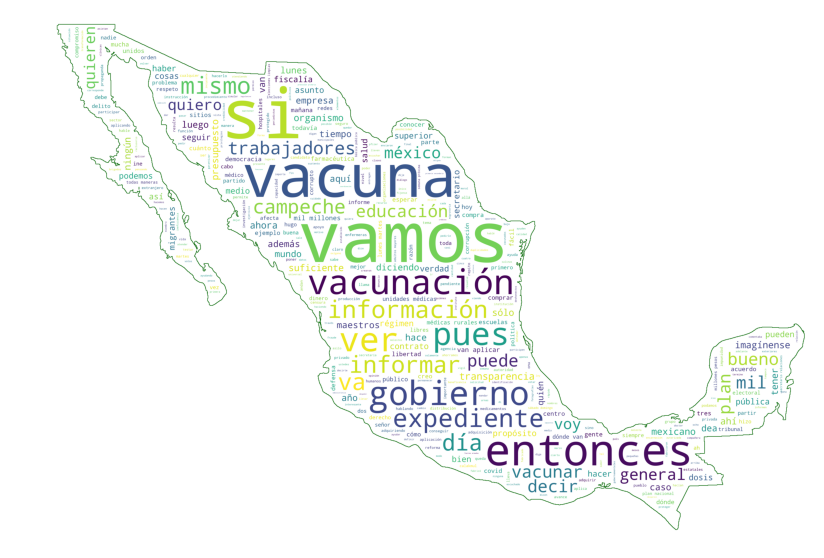

In [38]:
import os
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image 

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

map_mask = np.array(Image.open('test.png'))

wc = WordCloud(max_words=3000, margin=10, background_color='white',
scale=3, relative_scaling = 0.5, width=400, height=300, mask=map_mask,
random_state=1, stopwords=stop_words, contour_width=3, contour_color='darkgreen')

wc.generate(' '.join(filtered_words))

# store to file
wc.to_file(path.join(d, "wordcloud_presidente_2021_01_22.png"))

plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [39]:
import collections

#filtered_words = [word for word in data.split() if word not in stop_words]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

In [40]:
print(words,counts)

['vamos', 'si', 'entonces', 'vacunas', 'vacunación', 'ver', 'van', 'pues', 'mil', 'expediente'] [41, 39, 33, 22, 21, 20, 18, 18, 17, 17]


<BarContainer object of 10 artists>

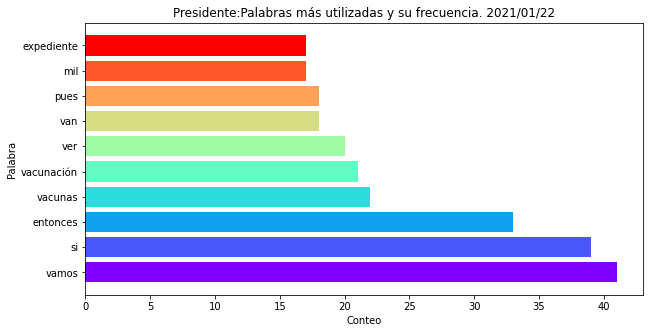

In [41]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

from matplotlib import rcParams

colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 10, 5

plt.title('Presidente:Palabras más utilizadas y su frecuencia. 2021/01/22')
plt.xlabel('Conteo')
plt.ylabel('Palabra')
plt.barh(words, counts, color=colors)

### Análisis para López-Gatell

In [42]:
dfe

,clean_speech
speaker,
HUGO LÓPEZ-GATELL RAMÍREZ,", : Con gusto presidente, gracias. Muy buenos ..."
INTERLOCUTOR,: Público y privado.
INTERLOCUTORA,: Y sobre la logística particularmente. Entend...
LUIS CRESENCIO SANDOVAL GONZÁLEZ,", : Con su permiso, señor presidente. Si ponen..."
PREGUNTA,": Buenos días, presidente. Meme Yamel, de The ..."
PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,: Buenos días. Vamos a informar sobre la distr...


In [43]:
# Take the speech from López Gattel
text = dfe['clean_speech'][0]

# Tokenise the data set
from nltk.tokenize import sent_tokenize, word_tokenize

words = word_tokenize(text)

# Removes punctuation and numbers
wordsFiltered = [word.lower() for word in words if word.isalpha()]

# Remove stop words from tokenised data set

filtered_words = [word for word in wordsFiltered if word not in stop_words]
print(filtered_words)

['gusto', 'presidente', 'gracias', 'buenos', 'días', 'secretarios', 'buenos', 'días', 'buenos', 'días', 'todas', 'ustedes', 'vamos', 'presentar', 'gráficos', 'informe', 'técnico', 'vamos', 'directamente', 'parte', 'vacunación', 'actualización', 'respecto', 'presentamos', 'ayer', 'tarde', 'horas', 'conferencia', 'vespertina', 'comentamos', 'días', 'horas', 'posteriores', 'tarde', 'siguen', 'abiertas', 'unidades', 'vacunación', 'entonces', 'informe', 'corte', 'noche', 'ayer', 'anunciado', 'mil', 'dosis', 'completaron', 'mil', 'mil', 'aplicadas', 'noche', 'mil', 'aquí', 'quiero', 'destacar', 'puede', 'ver', 'gráfica', 'fase', 'calibración', 'diciembre', 'enero', 'posteriormente', 'cantidad', 'mayor', 'dosis', 'medida', 'embarques', 'grandes', 'dosis', 'acumuladas', 'mil', 'puede', 'ver', 'cambio', 'velocidad', 'aplicación', 'ahora', 'aquí', 'insistimos', 'quede', 'claro', 'gobierno', 'mexicano', 'listo', 'recibir', 'poner', 'inusual', 'mayoría', 'países', 'enfrentan', 'retos', 'organizaci

In [44]:

counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)
    
print(words, counts)

['días', 'semana', 'dosis', 'casos', 'mil', 'méxico', 'aquí', 'si', 'vacuna', 'entonces'] [20, 19, 18, 16, 14, 14, 13, 11, 11, 10]


<BarContainer object of 10 artists>

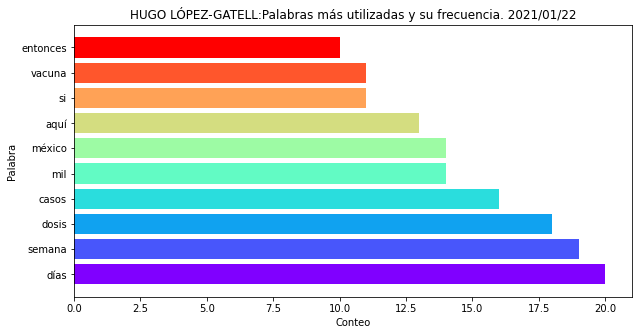

In [45]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 10, 5

plt.title('HUGO LÓPEZ-GATELL:Palabras más utilizadas y su frecuencia. 2021/01/22')
plt.xlabel('Conteo')
plt.ylabel('Palabra')
plt.barh(words, counts, color=colors)

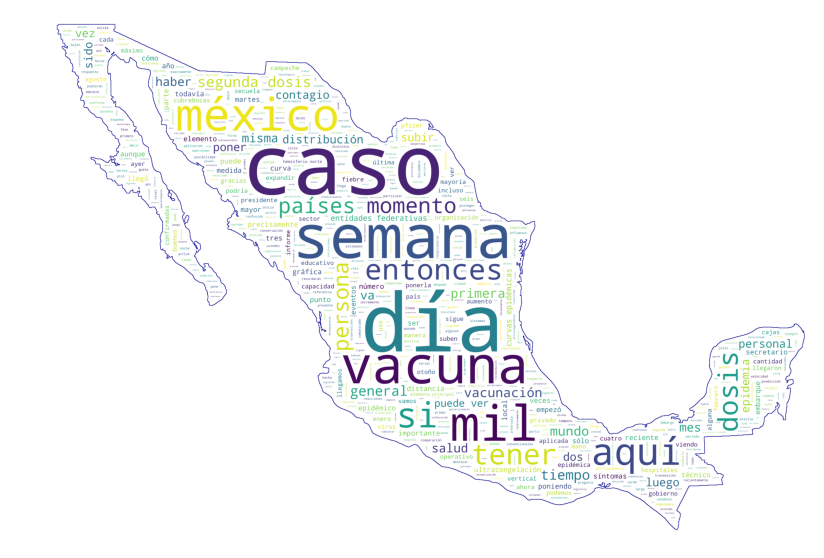

In [46]:
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

map_mask = np.array(Image.open('test.png'))

wc = WordCloud(max_words=3000, margin=10, background_color='white',
scale=3, relative_scaling = 0.5, width=400, height=300, mask=map_mask,
random_state=1, stopwords=stop_words, contour_width=3, contour_color='darkblue')

wc.generate(' '.join(filtered_words))

# store to file
wc.to_file(path.join(d, "wordcloud_lopez_gatell_2021_01_22.png"))

plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.axis("off")
plt.show()
